In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


#:**Data Exploring**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dData_set/matches.csv")
df.head()

,match_number,team1,team2,date_of_match,stadium,team1_goals,team2_goals,audience,team1_total_shots,team1_shots_on_target,...,team2_offsides,team2_yellow_cards,team2_red_cards,team2_tackles_won,team2_interceptions,team2_blocks,team2_clearances,team2_keeper_saves,team2_duels_won,team2_successful_dribbles
0,1,Germany,Scotland,15-06-2024,Fuball Arena Mnchen,5,1,"65,052",20,10,...,0,1,1,8(53%),6,5,22,5,41,5(56%)
1,2,Hungary,Switzerland,15-06-2024,Cologne Stadium,1,3,"41,676",6,2,...,2,2,0,9(69%),6,1,17,1,41,5(38%)
2,3,Spain,Croatia,15-06-2024,Olympiastadion Berlin,3,0,"68,844",11,5,...,0,0,0,10(71%),9,3,4,2,47,10(77%)
3,4,Italy,Albania,16-06-2024,BVB Stadion Dortmund,2,1,"60,512",17,5,...,1,2,0,5(63%),13,6,15,3,26,2(29%)
4,5,Poland,Netherlands,16-06-2024,Volksparkstadion,1,2,"48,117",12,7,...,0,1,0,11(79%),3,1,21,6,54,14(70%)


In [ ]:
print(df.shape)
df.info()

(51, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   match_number               51 non-null     int64 
 1   team1                      51 non-null     object
 2   team2                      51 non-null     object
 3   date_of_match              51 non-null     object
 4   stadium                    51 non-null     object
 5   team1_goals                51 non-null     int64 
 6   team2_goals                51 non-null     int64 
 7   audience                   51 non-null     object
 8   team1_total_shots          51 non-null     int64 
 9   team1_shots_on_target      51 non-null     int64 
 10  team2_total_shots          51 non-null     int64 
 11  team2_shots_on_target      51 non-null     int64 
 12  team1_fouls                51 non-null     int64 
 13  team1_corners              51 non-null     int64 
 14  tea

In [ ]:
df.isnull().sum()

,0
match_number,0
team1,0
team2,0
date_of_match,0
stadium,0
team1_goals,0
team2_goals,0
audience,0
team1_total_shots,0
team1_shots_on_target,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['audience']=df['audience'].str.replace(',','').astype(int)
df['audience'].head()

,audience
0,65052
1,41676
2,68844
3,60512
4,48117


In [ ]:
df.describe(include='all')

,match_number,team1,team2,date_of_match,stadium,team1_goals,team2_goals,audience,team1_total_shots,team1_shots_on_target,...,team2_offsides,team2_yellow_cards,team2_red_cards,team2_tackles_won,team2_interceptions,team2_blocks,team2_clearances,team2_keeper_saves,team2_duels_won,team2_successful_dribbles
count,51.000000,51,51,51,51,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51,51.000000,51.000000,51.000000,51.000000,51.000000,51
unique,NaN,24,24,24,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,43
top,NaN,Spain,England,25-06-2024,Fuball Arena Mnchen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12(63%),NaN,NaN,NaN,NaN,NaN,5(56%)
freq,NaN,6,4,4,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
mean,26.000000,NaN,NaN,NaN,NaN,1.274510,1.019608,52574.274510,13.372549,4.725490,...,1.529412,2.333333,0.039216,NaN,7.039216,3.921569,21.098039,3.490196,45.960784,NaN
std,14.866069,NaN,NaN,NaN,NaN,1.096876,0.905322,9613.064999,6.059574,2.764622,...,1.591891,1.966384,0.196039,NaN,3.026290,2.423577,9.535733,2.309741,8.953124,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,38305.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,4.000000,0.000000,26.000000,NaN
25%,13.500000,NaN,NaN,NaN,NaN,0.500000,0.000000,46301.000000,9.500000,3.000000,...,0.000000,1.000000,0.000000,NaN,5.000000,2.000000,15.000000,2.000000,40.000000,NaN
50%,26.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,48953.000000,13.000000,4.000000,...,1.000000,2.000000,0.000000,NaN,7.000000,3.000000,19.000000,3.000000,44.000000,NaN
75%,38.500000,NaN,NaN,NaN,NaN,2.000000,1.000000,61319.000000,17.500000,6.500000,...,2.000000,3.000000,0.000000,NaN,9.000000,6.000000,26.500000,5.000000,50.000000,NaN


In [ ]:
df[df['audience']==df['audience'].min()]

,match_number,team1,team2,date_of_match,stadium,team1_goals,team2_goals,audience,team1_total_shots,team1_shots_on_target,...,team2_offsides,team2_yellow_cards,team2_red_cards,team2_tackles_won,team2_interceptions,team2_blocks,team2_clearances,team2_keeper_saves,team2_duels_won,team2_successful_dribbles
43,44,Austria,Turkiye,03-07-2024,Leipzig Stadium,1,2,38305,21,5,...,1,2,0,8(40%),13,7,55,4,56,7(58%)


In [ ]:
df[df['audience']==df['audience'].max()]


,match_number,team1,team2,date_of_match,stadium,team1_goals,team2_goals,audience,team1_total_shots,team1_shots_on_target,...,team2_offsides,team2_yellow_cards,team2_red_cards,team2_tackles_won,team2_interceptions,team2_blocks,team2_clearances,team2_keeper_saves,team2_duels_won,team2_successful_dribbles
47,48,Netherlands,Turkiye,07-07-2024,Olympiastadion Berlin,2,1,70091,11,4,...,2,1,1,7(41%),12,3,15,3,47,5(42%)


#**:Data Preprocessing**

In [ ]:
sta_df=df['stadium'].value_counts().reset_index()
sta_df

,stadium,count
0,Fuball Arena Mnchen,6
1,Olympiastadion Berlin,6
2,BVB Stadion Dortmund,6
3,Cologne Stadium,5
4,Volksparkstadion,5
5,Stuttgart Arena,5
6,Frankfurt Arena,5
7,Dsseldorf Arena,5
8,Arena AufSchalke,4
9,Leipzig Stadium,4


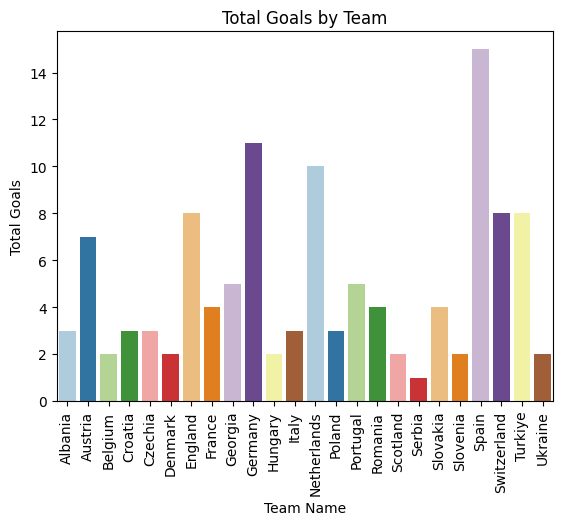

In [ ]:
Team_Goals = df.groupby('team1')['team1_goals'].sum()+ df.groupby('team2')['team2_goals'].sum()
Team_Goals_df = Team_Goals.reset_index(name='Goals')
#print(Team_Goals_df.sort_values(by='Goals', ascending=False))
#print(Team_Goals)
sns.barplot(x='team1', y='Goals', data=Team_Goals_df,palette='Paired')
plt.xticks(rotation=90)
plt.xlabel('Team Name')
plt.ylabel('Total Goals')
plt.title('Total Goals by Team')
plt.show()

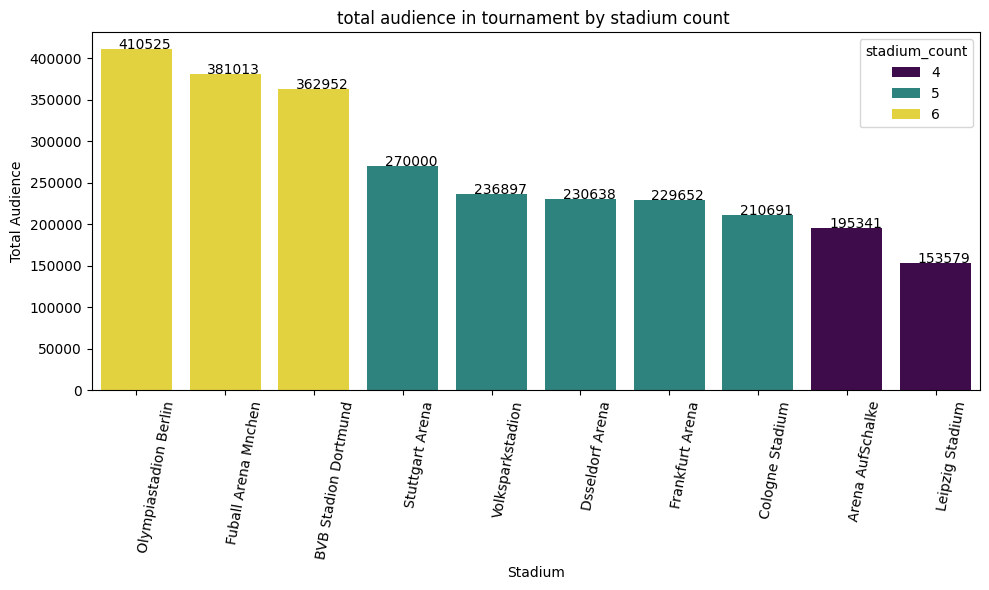

In [ ]:
total_audience_by_stadium=df.groupby(['stadium']).agg(stadium_count=('stadium','count'),audience=('audience','sum'))
total_audience_by_stadium=total_audience_by_stadium.sort_values(by='audience',ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='stadium', y='audience',hue='stadium_count', data=total_audience_by_stadium,palette='viridis')
for index, value in enumerate(total_audience_by_stadium['audience']):
    plt.text(index-0.2, value, str(value))
plt.xlabel('Stadium')
plt.ylabel('Total Audience')
plt.title('total audience in tournament by stadium count ')
plt.xticks(rotation=80, ha='left')
plt.tight_layout()
plt.show()

In [ ]:
print(total_audience_by_stadium)
print('The total attendance at matches inside the stadium in the Euro 2024 tournament is:',total_audience_by_stadium['audience'].sum())

                 stadium  stadium_count  audience
0  Olympiastadion Berlin              6    410525
1    Fuball Arena Mnchen              6    381013
2   BVB Stadion Dortmund              6    362952
3        Stuttgart Arena              5    270000
4       Volksparkstadion              5    236897
5        Dsseldorf Arena              5    230638
6        Frankfurt Arena              5    229652
7        Cologne Stadium              5    210691
8       Arena AufSchalke              4    195341
9        Leipzig Stadium              4    153579
The total attendance at matches inside the stadium in the Euro 2024 tournament is: 2681288


In [ ]:
df['team']=df['team1']

In [ ]:
team_goal=df.groupby('team')['team1_goals'].sum()+df.groupby('team2')['team2_goals'].sum()
team_goal.sort_values(ascending=False)

,0
team,
Spain,15
Germany,11
Netherlands,10
Turkiye,8
Switzerland,8
England,8
Austria,7
Georgia,5
Portugal,5


In [ ]:
team_shot_on_target=df.groupby('team')['team1_shots_on_target'].sum()+df.groupby('team2')['team2_shots_on_target'].sum()
team_shot_on_target.sort_values(ascending=False)

,0
team,
Spain,44
Germany,34
Portugal,26
England,25
France,24
Turkiye,23
Netherlands,22
Austria,22
Switzerland,21


In [ ]:
team_shot=df.groupby('team')['team1_total_shots'].sum() + df.groupby('team2')['team2_total_shots'].sum()
team_shot

,0
team,
Albania,33
Austria,51
Belgium,53
Croatia,44
Czechia,44
Denmark,53
England,76
France,96
Georgia,30


In [ ]:
team_matches_played = df.groupby('team1')['team1'].count() + df.groupby('team2')['team2'].count()
team_matches_played.sort_values(ascending=False)

,0
team1,
England,7
Spain,7
Netherlands,6
France,6
Turkiye,5
Switzerland,5
Portugal,5
Germany,5
Austria,4


In [ ]:
col=df.columns
print(col)

Index(['match_number', 'team1', 'team2', 'date_of_match', 'stadium',
       'team1_goals', 'team2_goals', 'audience', 'team1_total_shots',
       'team1_shots_on_target', 'team2_total_shots', 'team2_shots_on_target',
       'team1_fouls', 'team1_corners', 'team1_blocked_shots', 'team1_passes',
       'team1_accurate_passes', 'team1_accurate_long_balls',
       'team1_accurate_crosses', 'team1_throws', 'team1_offsides',
       'team1_yellowcards', 'team1_red_cards', 'team1_tackles_won',
       'team1_interceptions', 'team1_blocks', 'team1_clearances',
       'team1_keeper_saves', 'team1_duels_won', 'team1_successful_dribbles',
       'team2_accurate_passes', 'team2_fouls_committed', 'team2_corners',
       'team2_blocked_shots', 'team2_passes', 'team2_accurate_long_balls',
       'team2_accurate_crosses', 'team2_throws', 'team2_offsides',
       'team2_yellow_cards', 'team2_red_cards', 'team2_tackles_won',
       'team2_interceptions', 'team2_blocks', 'team2_clearances',
       'team2_k

#:**Final Datasheet**

In [52]:
all_shots = pd.DataFrame({'total shots': team_shot,'total shots on target': team_shot_on_target,
                          'team goal':team_goal,'team matches played':team_matches_played})
all_shots['total shots out target']=all_shots['total shots']- all_shots['total shots on target']
all_shots['goals from total shorts pct']=(all_shots['team goal'] / all_shots['total shots']) * 100
all_shots['goals from shot on target pct'] = (all_shots['team goal'] / all_shots['total shots on target']) * 100
all_shots['shot on target pct'] = (all_shots['total shots on target'] / all_shots['total shots']) * 100
all_shots['total shots per match'] = all_shots['total shots'] / all_shots['team matches played']
all_shots['shots on target per match'] = all_shots['total shots on target'] / all_shots['team matches played']
all_shots['goal per match'] = all_shots['team goal'] / all_shots['team matches played']
all_shots.sort_values(by='team goal',ascending=False)


,total shots,total shots on target,team goal,team matches played,total shots out target,goals from total shorts pct,goals from shot on target pct,shot on target pct,total shots per match,shots on target per match,goal per match
Spain,122,44,15,7,78,12.295082,34.090909,36.065574,17.428571,6.285714,2.142857
Germany,95,34,11,5,61,11.578947,32.352941,35.789474,19.000000,6.800000,2.200000
Netherlands,81,22,10,6,59,12.345679,45.454545,27.160494,13.500000,3.666667,1.666667
Turkiye,72,23,8,5,49,11.111111,34.782609,31.944444,14.400000,4.600000,1.600000
Switzerland,57,21,8,5,36,14.035088,38.095238,36.842105,11.400000,4.200000,1.600000
England,76,25,8,7,51,10.526316,32.000000,32.894737,10.857143,3.571429,1.142857
Austria,51,22,7,4,29,13.725490,31.818182,43.137255,12.750000,5.500000,1.750000
Georgia,30,9,5,4,21,16.666667,55.555556,30.000000,7.500000,2.250000,1.250000
Portugal,88,26,5,5,62,5.681818,19.230769,29.545455,17.600000,5.200000,1.000000
Slovakia,50,16,4,4,34,8.000000,25.000000,32.000000,12.500000,4.000000,1.000000


In [53]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/dData_set/all_shots.csv', index=False)

In [ ]:
all_shots.columns

Index(['total shots', 'total shots on target', 'team goal',
       'team matches played', 'total shots out target',
       'goals from total shorts pct', 'goals from shot on target pct',
       'shot on target pct', 'total shots per match',
       'shots on target per match', 'goal per match'],
      dtype='object')

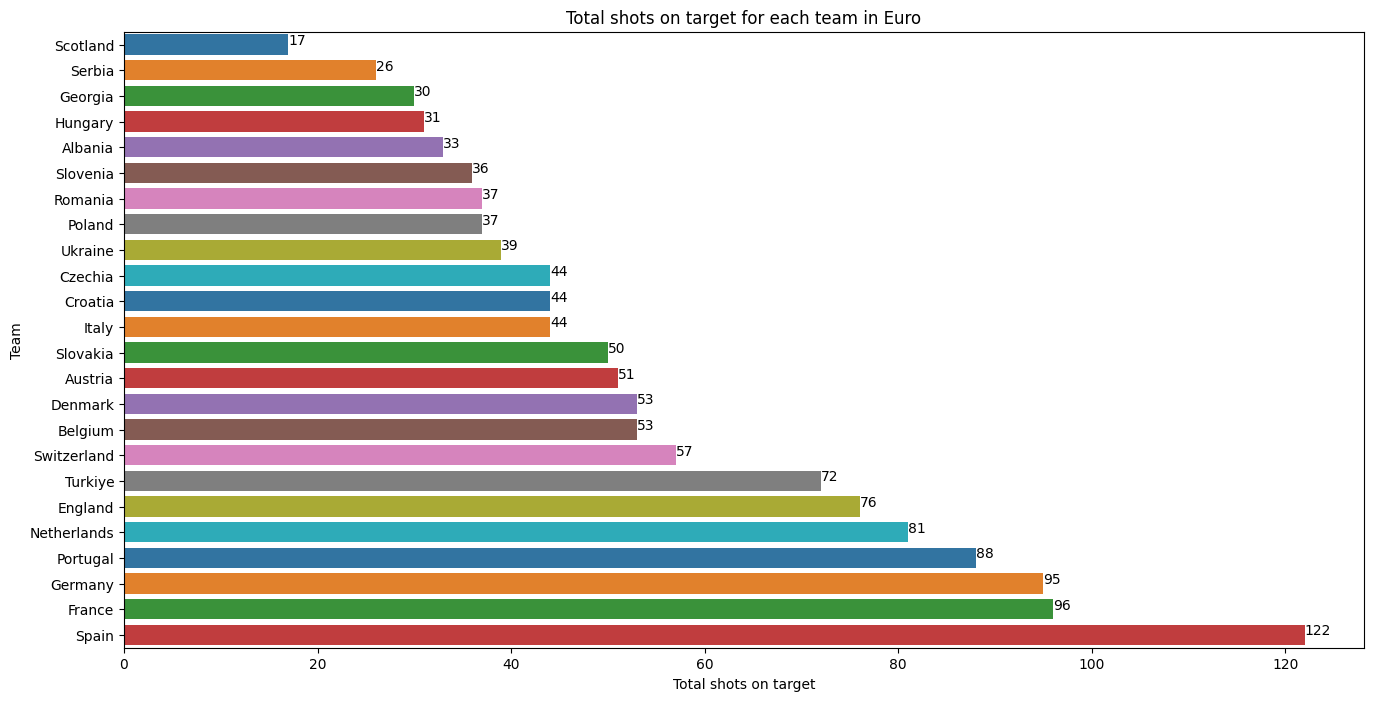

In [55]:
Total_shots=all_shots['total shots'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(x=Total_shots,y=Total_shots.index,palette='tab10')
for index,value in enumerate(Total_shots):
    plt.text(value,index,str(value))
plt.xlabel('Total shots on target')
plt.ylabel('Team')
plt.title('Total shots on target for each team in Euro')
plt.show()


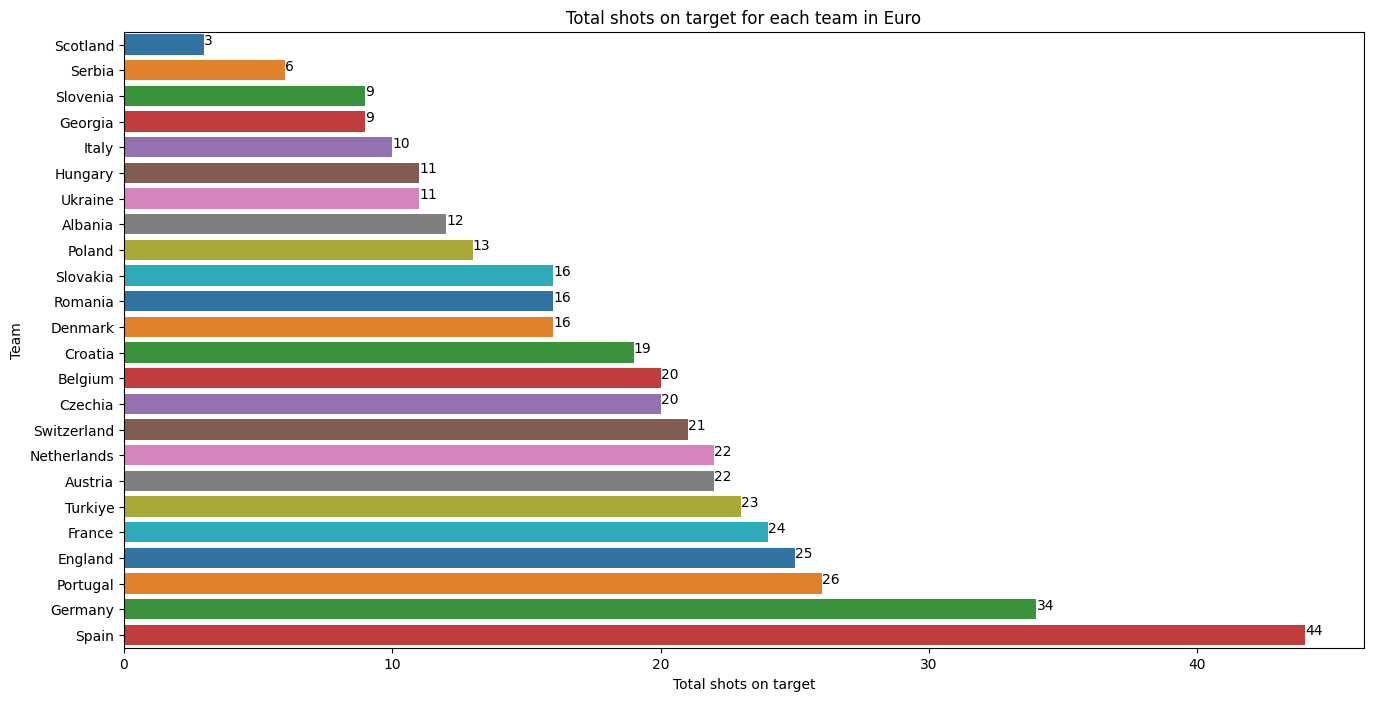

In [ ]:
Total_shots_target=all_shots['total shots on target'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(x=Total_shots_target,y=Total_shots_target.index,palette='tab10')
for index,value in enumerate(Total_shots_target):
    plt.text(value,index,str(value))
plt.xlabel('Total shots on target')
plt.ylabel('Team')
plt.title('Total shots on target for each team in Euro')
plt.show()


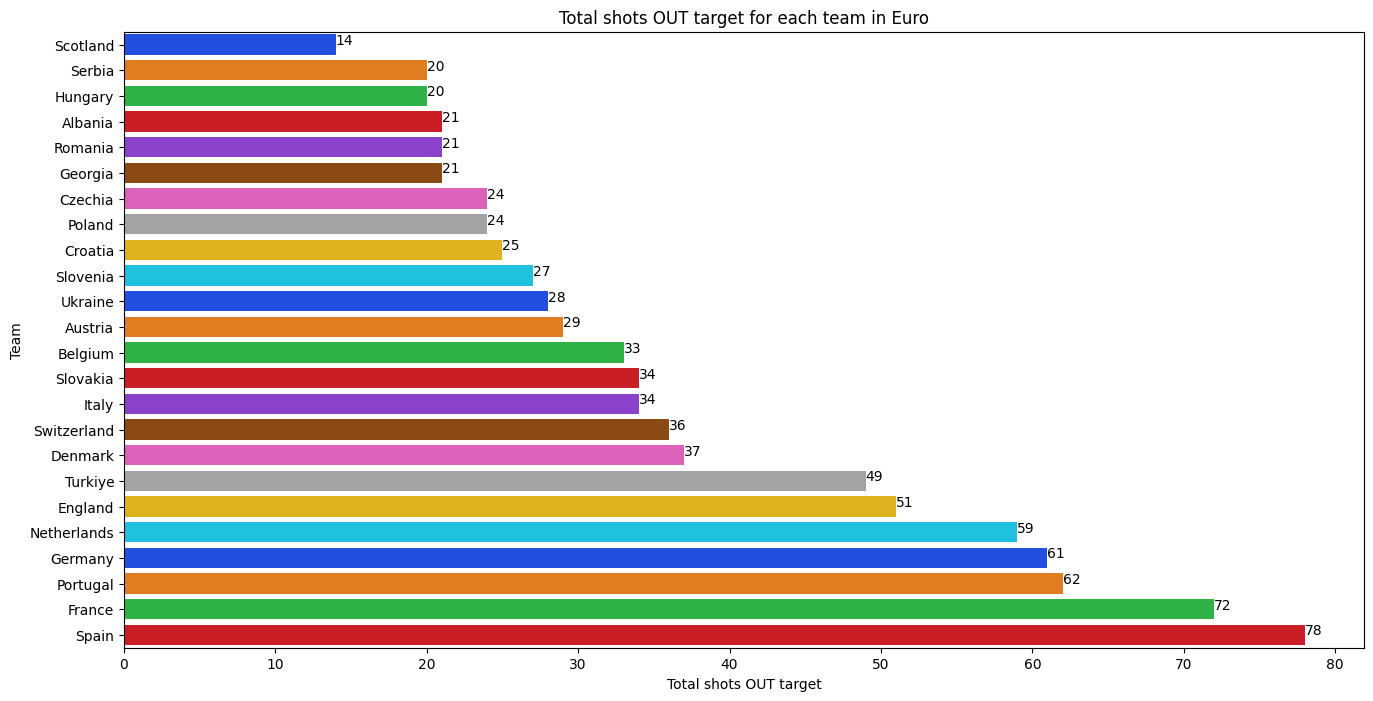

In [ ]:
Total_shots_Miss_target=all_shots['total shots out target'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(x=Total_shots_Miss_target,y=Total_shots_Miss_target.index,palette='bright')
for index,value in enumerate(Total_shots_Miss_target):
    plt.text(value,index,str(value))
plt.xlabel('Total shots OUT target')
plt.ylabel('Team')
plt.title('Total shots OUT target for each team in Euro')
plt.show()

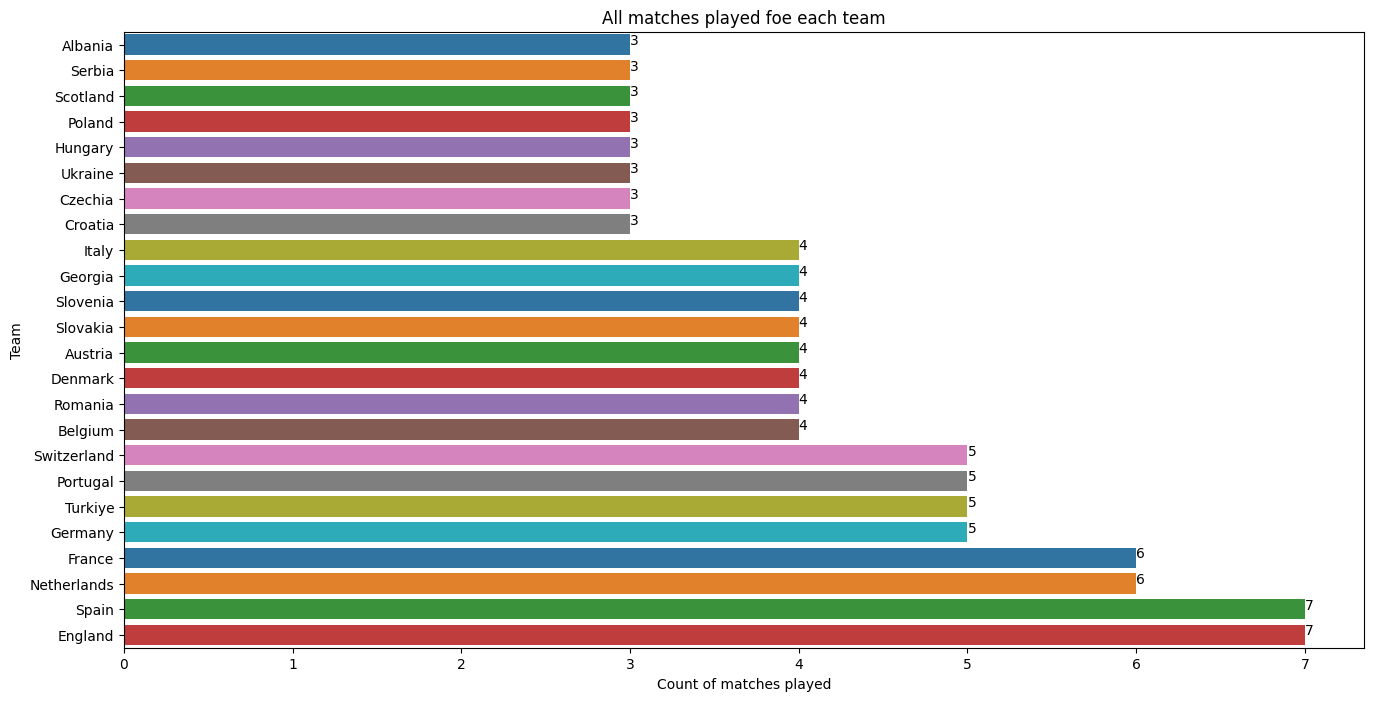

In [ ]:
team_matches_played=all_shots['team matches played'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(x=team_matches_played,y=team_matches_played.index,palette='tab10')
for index , value in enumerate(team_matches_played):
    plt.text(value , index, str(value))

plt.ylabel('Team')
plt.xlabel("Count of matches played")
plt.title('All matches played foe each team')
plt.show()

Number of goals scored during the tournament 117
Spain          15
Germany        11
Netherlands    10
Turkiye         8
Switzerland     8
England         8
Austria         7
Georgia         5
Portugal        5
Slovakia        4
France          4
Romania         4
Poland          3
Albania         3
Italy           3
Czechia         3
Croatia         3
Hungary         2
Scotland        2
Denmark         2
Slovenia        2
Belgium         2
Ukraine         2
Serbia          1
Name: team goal, dtype: int64


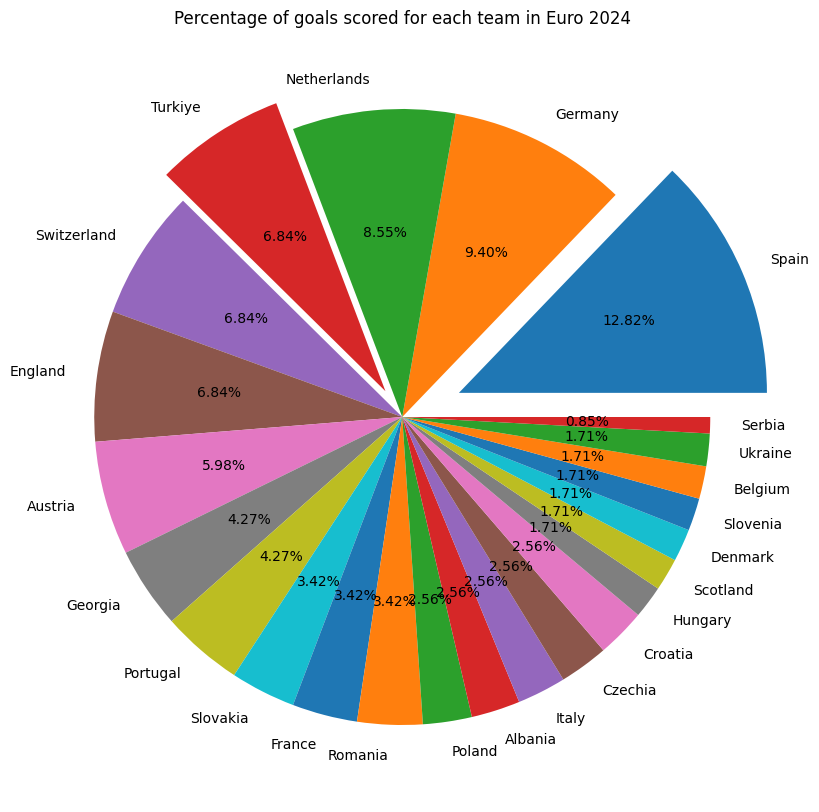

In [ ]:

print('Number of goals scored during the tournament', all_shots['team goal'].sum())
goals=all_shots['team goal'].sort_values(ascending=False)
print(goals)
plt.figure(figsize=(20, 10))
plt.pie(goals,autopct='%0.2f%%',labels=goals.index,explode=[0.2,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title("Percentage of goals scored for each team in Euro 2024")
plt.show()

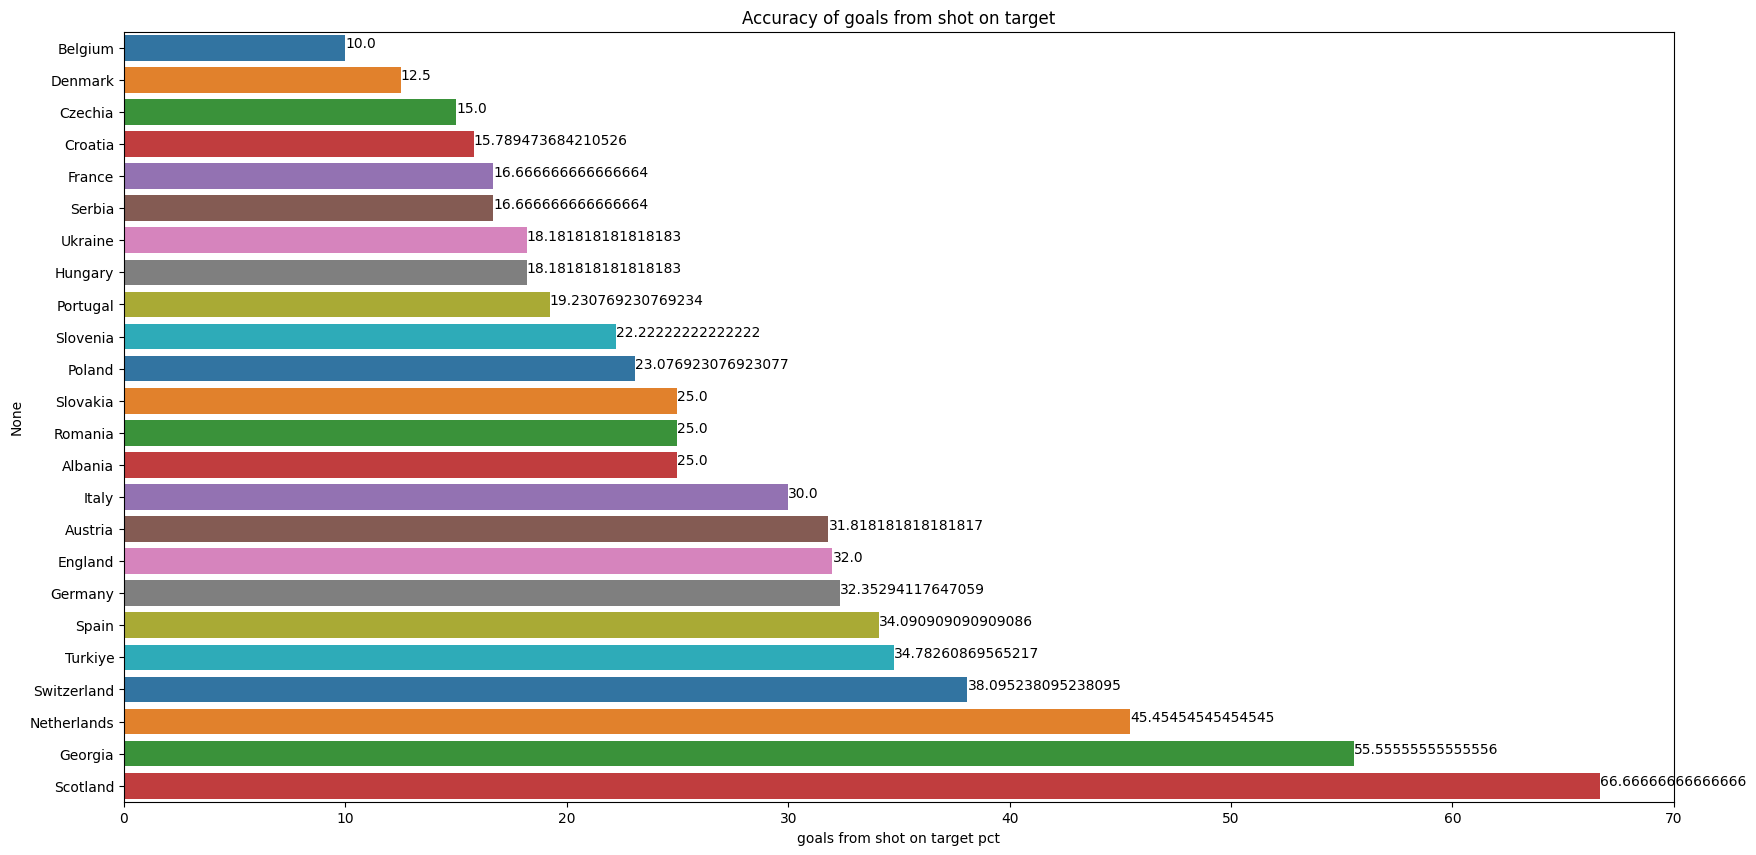

In [ ]:

goals_from_shot_pct= all_shots['goals from shot on target pct'].sort_values()
plt.figure(figsize=(20, 10))
sns.barplot(y=goals_from_shot_pct.index,x=goals_from_shot_pct, palette='tab10')
for index , value in enumerate(goals_from_shot_pct):
    plt.text(value , index, str(value))
plt.title("Accuracy of goals from shot on target")
plt.show()

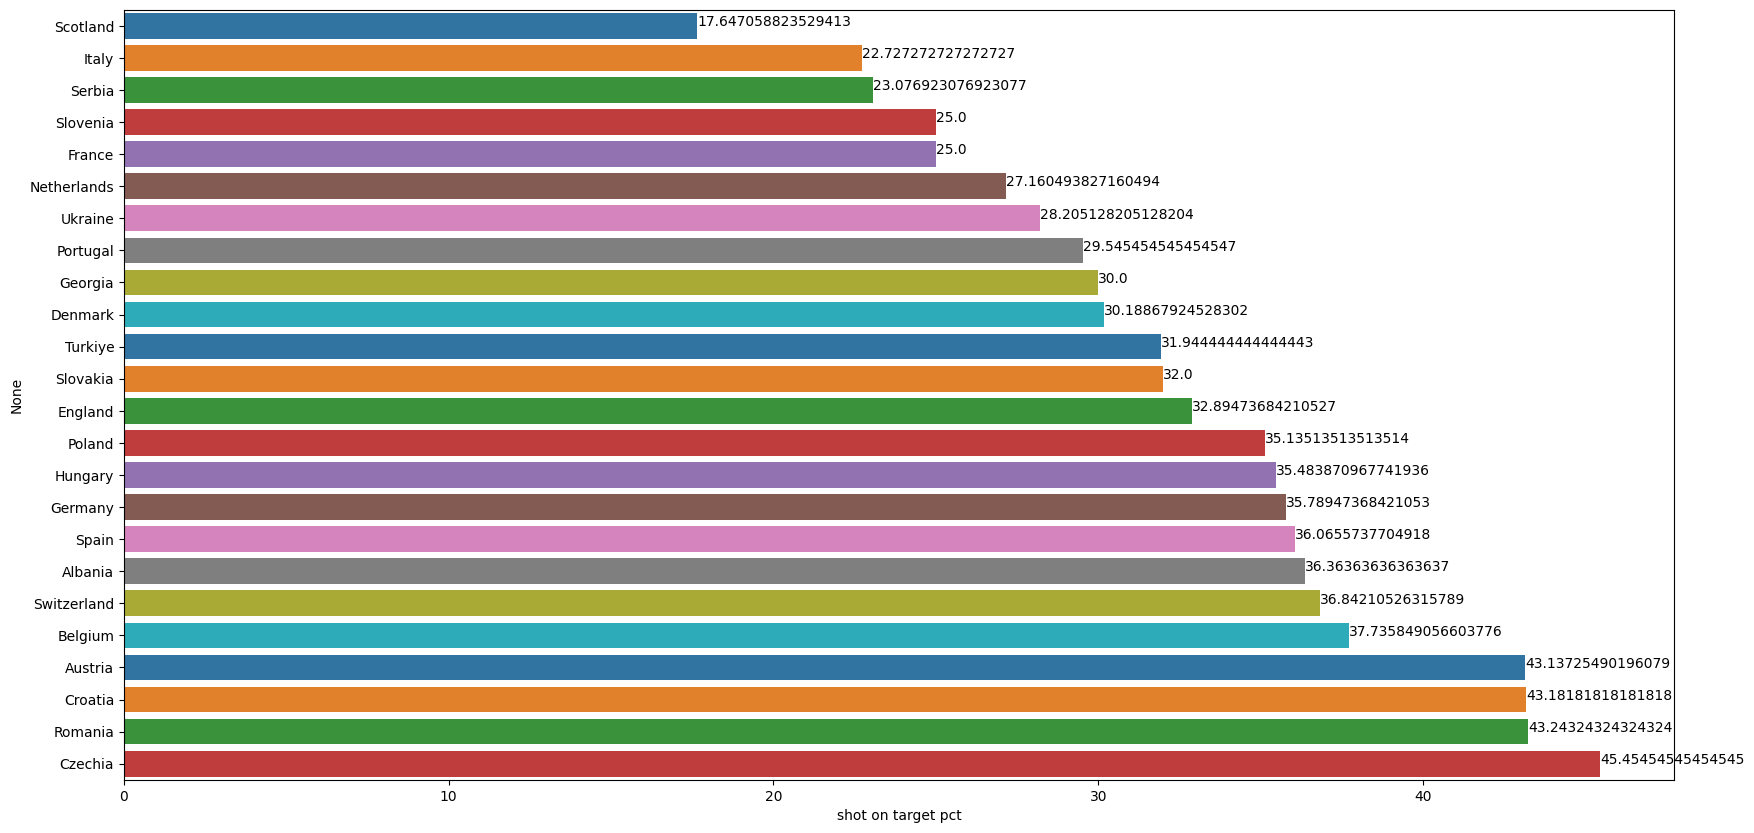

In [ ]:

shot_pct= all_shots['shot on target pct'].sort_values()
plt.figure(figsize=(20, 10))
sns.barplot(y=shot_pct.index,x=shot_pct,palette='tab10')
for index , value in enumerate(shot_pct):
    plt.text(value , index, str(value))

plt.show()

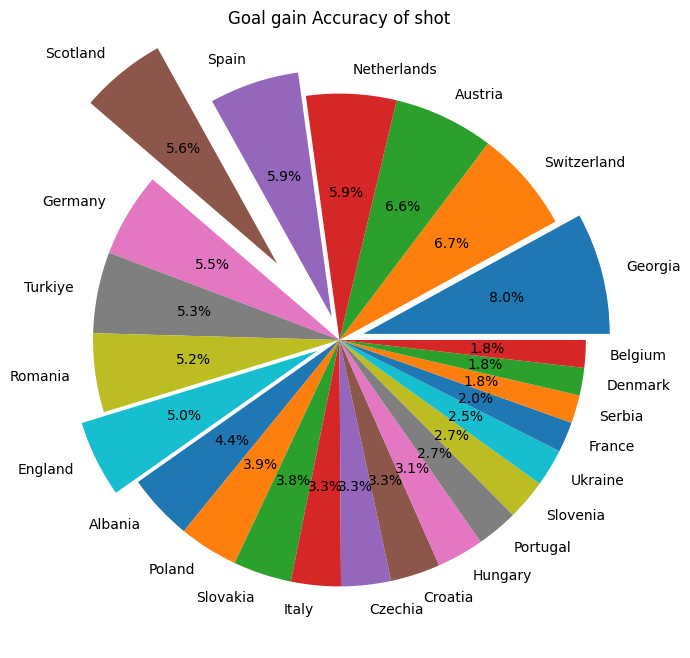

In [ ]:
goals_from_total_shots_pct= all_shots['goals from total shorts pct'].sort_values(ascending=False)
plt.figure(figsize=(16, 8))
plt.pie(goals_from_total_shots_pct,autopct='%1.1f%%',labels=goals_from_total_shots_pct.index,explode=[0.1,0,0,0,0.1,0.4,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title("Goal gain Accuracy of shot")
plt.show()

Scotland sort on target এ সর্বোচ্চ accuracy তে গোল পাইছে, কিন্তু Total sort বিবেচনা করলে Georgia সর্বোচ্চ accuracy তে গোল পাইছে। যে দল কিনা ২য় রাউন্ড এ উঠে বাদ পড়েছিলো।   ~Raisuddun Tamim

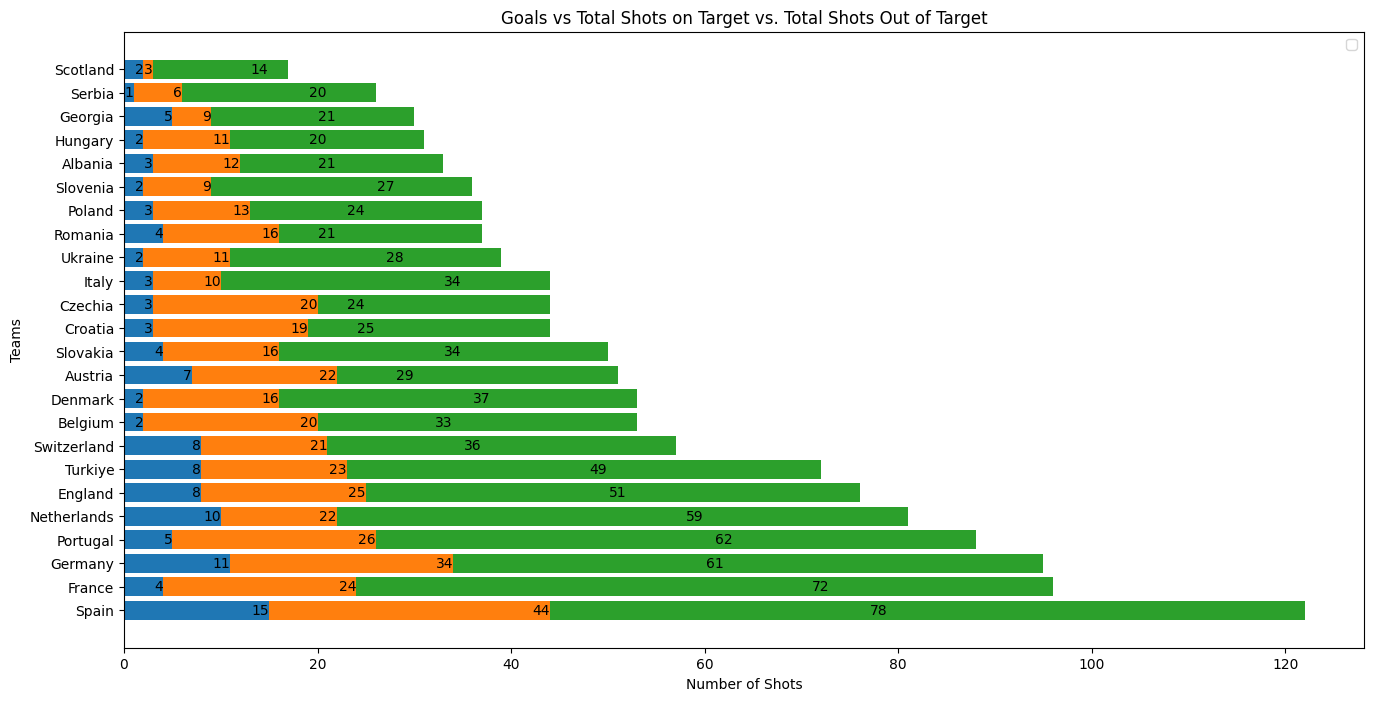

In [ ]:
all_shots = all_shots.sort_values(by='total shots',ascending=False)
plt.figure(figsize=(16, 8))
#team=all_shots['team goal'].index
bars1 = plt.barh(all_shots['total shots'].index, all_shots['team goal'])
#sns.barplot(x=all_shots['team goal'],y=team)
for index , value in enumerate( all_shots['team goal']):
    plt.text(value , index, str(value),ha='right' ,va='center')

bars2 = plt.barh(all_shots['total shots'].index, all_shots['total shots on target'],left = all_shots['team goal'] )
#sns.barplot(x=all_shots['total shots on target'],y=team)

for index , value in enumerate(all_shots['total shots on target']):
    plt.text(value , index, str(value),ha='right' ,va='center')

bars3 = plt.barh(all_shots['total shots'].index, all_shots['total shots out target'], left=all_shots['total shots on target'])
#sns.barplot(x=all_shots['total shots out target'],y=team)
for index , value in enumerate(all_shots['total shots out target']):
    plt.text(value , index, str(value),ha='center' ,va='center')
plt.xlabel('Number of Shots')
plt.ylabel('Teams')
plt.title('Goals vs Total Shots on Target vs. Total Shots Out of Target')
plt.legend()


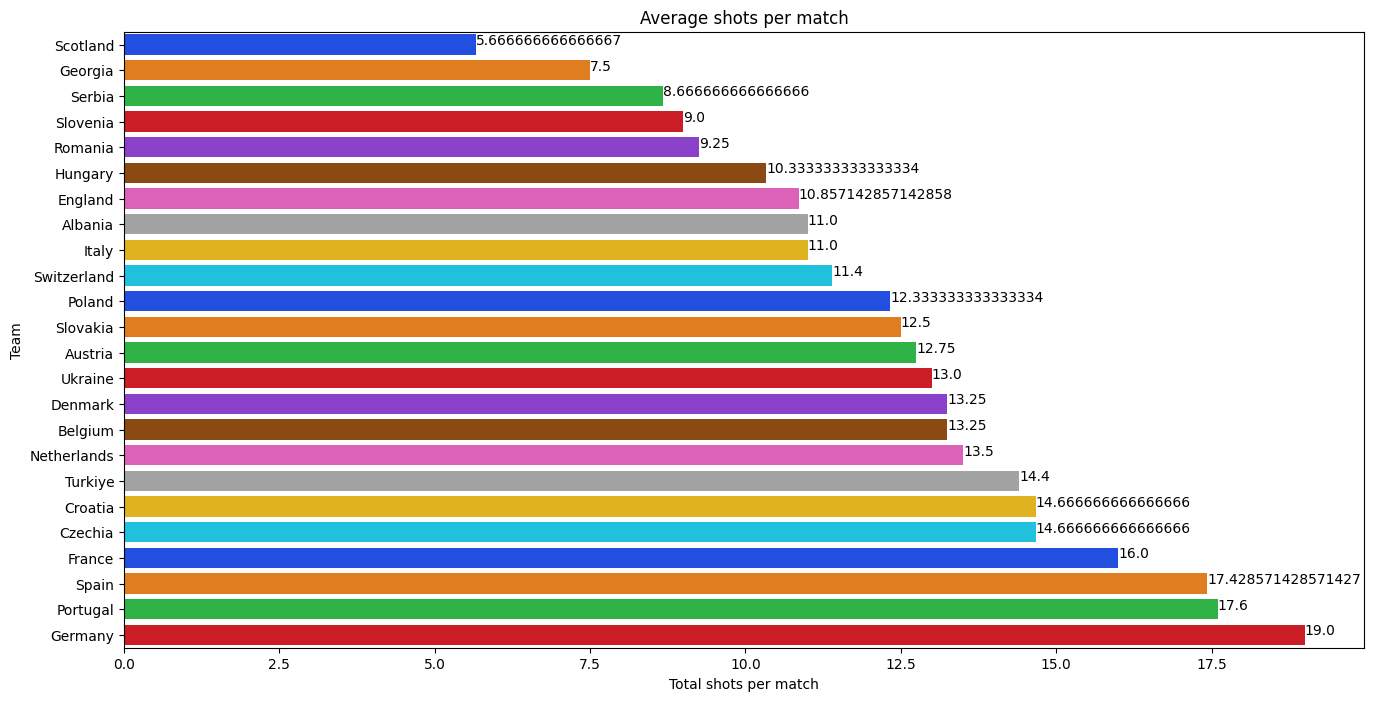

In [ ]:

total_shots_per_match=all_shots['total shots per match'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(y=total_shots_per_match.index,x=total_shots_per_match, palette='bright')
for index , value in enumerate(total_shots_per_match):
    plt.text(value , index, str(value))
plt.ylabel('Team')
plt.xlabel("Total shots per match")
plt.title('Average shots per match')
plt.show()

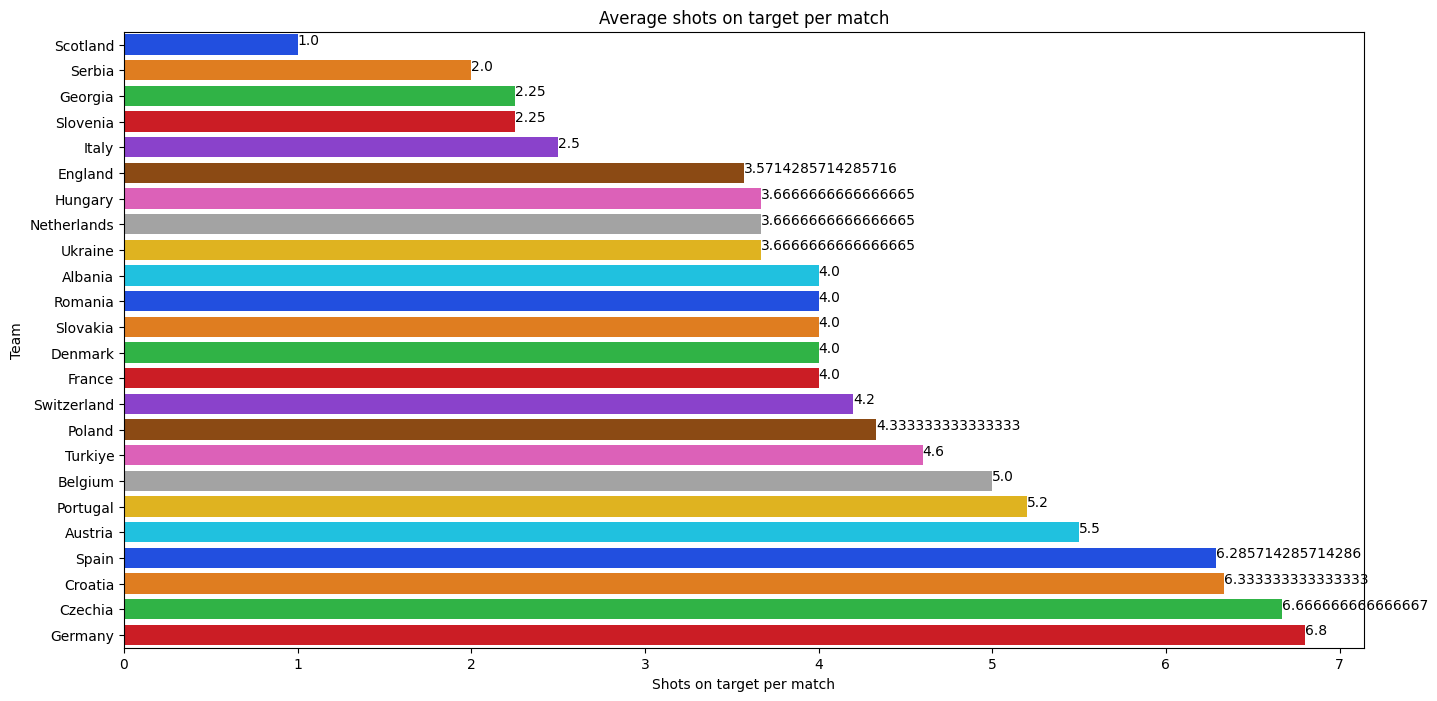

In [ ]:
shots_on_target_per_match=all_shots['shots on target per match'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(y=shots_on_target_per_match.index,x=shots_on_target_per_match, palette='bright')
for index , value in enumerate(shots_on_target_per_match):
    plt.text(value , index, str(value))
plt.ylabel('Team')
plt.xlabel("Shots on target per match")
plt.title('Average shots on target per match')
plt.show()

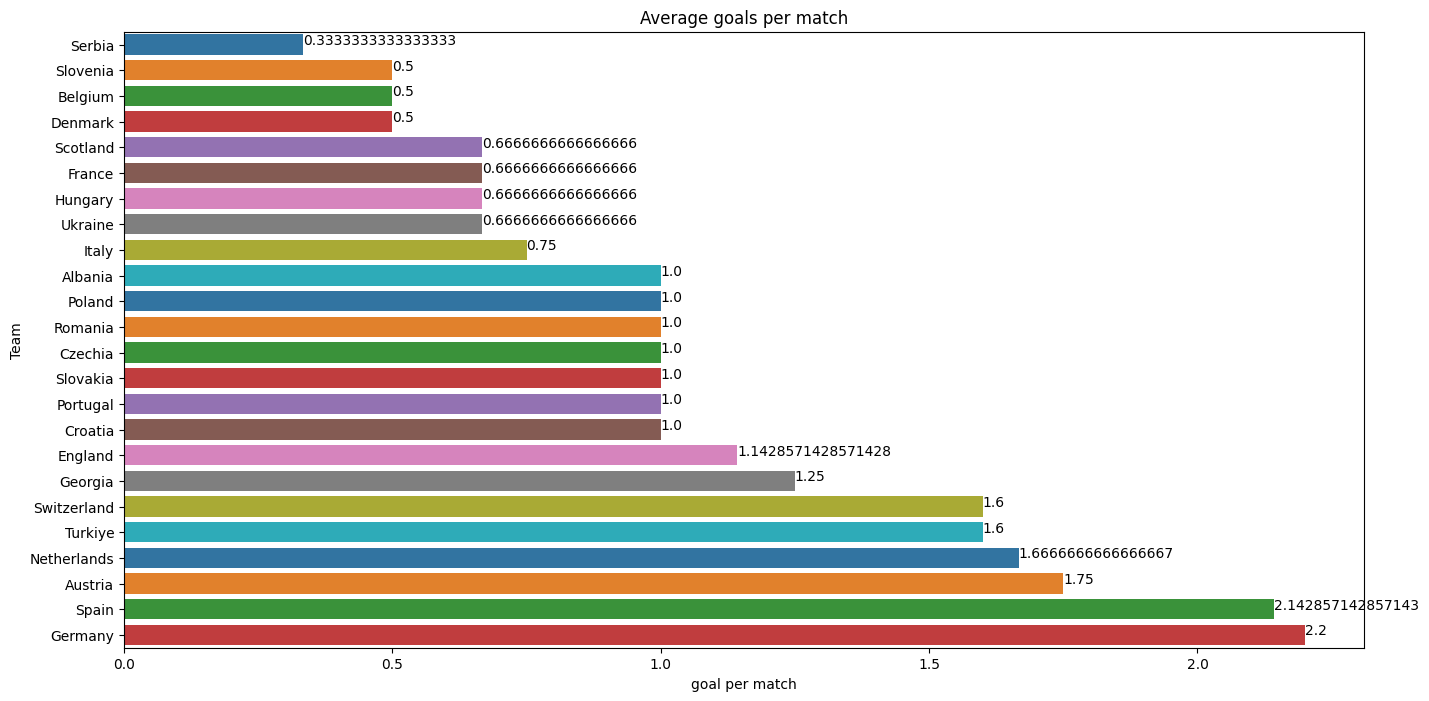

In [ ]:
goal_per_match=all_shots['goal per match'].sort_values()
plt.figure(figsize=(16, 8))
sns.barplot(y=goal_per_match.index,x=goal_per_match,palette='tab10')
for index , value in enumerate(goal_per_match):
    plt.text(value , index, str(value))
plt.ylabel('Team')
plt.xlabel("goal per match")
plt.title('Average goals per match')
plt.show()

১। মোট ২৪ টি দল অংশগ্রহন  করেছে,৫১ টি ম্যাচ খেলা হয়েছে।
২। মোট গোল সংখ্যা ১১৭ টি।
৩। স্পেন ও ইংল্যান্ড ফাইনাল ম্যাচ খেলেছে এবং স্পেন চ্যাম্পিয়ান হয়েছে।

#স্পেনের মোট গোল সংখ্যা ১৫টি (সর্বোচ্চ), ইংল্যান্ড এর গোল সংখ্যা ৮টি (৪র্থ)

Raisuddin Tamim - 214020 &
Toufique Ahmed - 214087
#~ধন্যবাদ